In [1]:
from audio.extractor import load_data_from_meta,load_data_from_meta_demo

data=load_data_from_meta_demo()
data['X_train']

partition='train'
D:\repos\CCSER\SER\meta_files\train_emodb_HNS.csv @🎈{meta_file}
[I] Loading audio file paths and its corresponding labels...
meta_file存在D:\repos\CCSER\SER\meta_files\train_emodb_HNS.csv文件!
检查特征文件D:\repos\CCSER\SER\features\emodb_chroma-mel-mfcc_HNS_169.npy是否存在...
self.e_config=['sad', 'neutral', 'happy']
self.f_config=['chroma', 'mel', 'mfcc']
特征矩阵文件(.npy)已经存在,直接导入:loading...
(169, 180) @{feature.shape}
[Info] Adding  train samples
partition='test'
D:\repos\CCSER\SER\meta_files\test_emodb_HNS.csv @🎈{meta_file}
[I] Loading audio file paths and its corresponding labels...
meta_file存在D:\repos\CCSER\SER\meta_files\test_emodb_HNS.csv文件!
检查特征文件D:\repos\CCSER\SER\features\emodb_chroma-mel-mfcc_HNS_43.npy是否存在...
self.e_config=['sad', 'neutral', 'happy']
self.f_config=['chroma', 'mel', 'mfcc']
特征矩阵文件(.npy)已经存在,直接导入:loading...
(43, 180) @{feature.shape}
[Info] Adding  test samples


array([[ 0.6140554 ,  0.63208479,  0.62568927, ..., -0.15077989,
        -3.0561893 , -1.20821035],
       [ 0.43371701,  0.44542935,  0.50270736, ...,  6.42088842,
         5.73193407,  5.49575281],
       [ 0.55783778,  0.59623051,  0.62581438, ...,  4.11810064,
         3.74455643,  4.19198132],
       ...,
       [ 0.57763308,  0.62455612,  0.67713386, ..., -2.30950379,
        -0.32031474, -3.12711573],
       [ 0.41459158,  0.43538466,  0.44827828, ...,  1.46528864,
        -0.79318225, -0.76670861],
       [ 0.48803413,  0.48957926,  0.52813661, ...,  2.92184377,
         0.63073313,  2.12603712]])

In [5]:

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# data = datasets.load_iris()
# X = data.data
# y = data.target
# target_names = data.target_names
X=data['X_test']
y=data['y_test']
target_names=y


In [4]:
X.shape,y.shape

((43, 180), (43,))

In [7]:
y

array(['sad', 'neutral', 'neutral', 'happy', 'happy', 'neutral', 'sad',
       'happy', 'neutral', 'neutral', 'sad', 'happy', 'happy', 'happy',
       'sad', 'sad', 'neutral', 'neutral', 'sad', 'neutral', 'neutral',
       'neutral', 'happy', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'sad', 'neutral', 'neutral', 'happy', 'sad', 'sad',
       'neutral', 'neutral', 'sad', 'sad', 'sad', 'sad', 'sad', 'happy',
       'neutral'], dtype='<U7')

explained variance ratio (first two components): [0.34184143 0.27692456]


C:\Users\cxxu\AppData\Local\Temp\ipykernel_17732\296531700.py:19: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
C:\Users\cxxu\AppData\Local\Temp\ipykernel_17732\296531700.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name


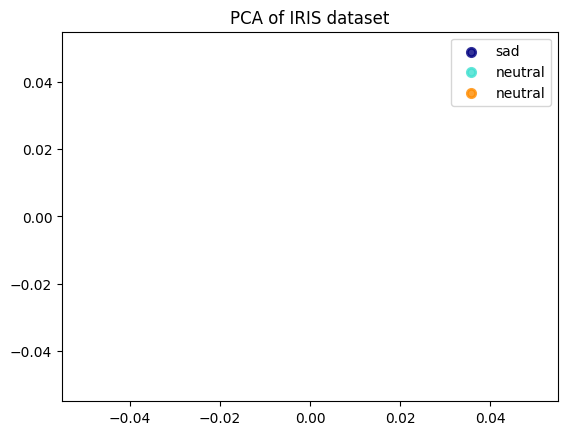

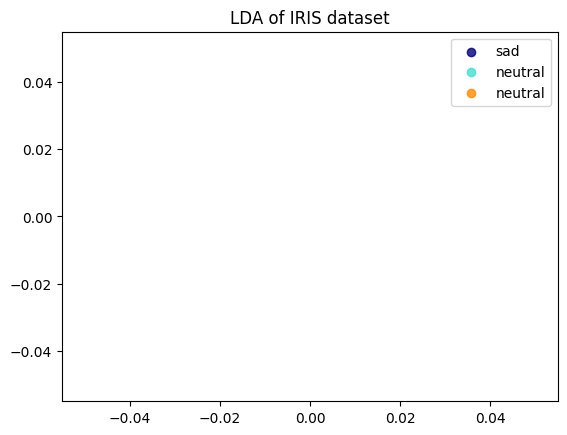

In [6]:



pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of data dataset")

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of data dataset")

plt.show()